# Using traitlets to generate and modify maps of surface weather station data

In [1]:
from metpy.mapping.mpmap_traitlets import MetpyMap

from metpy.io.gini import GiniFile
from metpy.cbook import get_test_data, get_test_data_path
from metpy.plots.ctables import registry

import cartopy.crs as ccrs

to_proj = ccrs.AlbersEqualArea(central_longitude=-97.0000, central_latitude=38.0000)

MetpyMap is an object that contains all of the options, data, and logic to plot meteorological data on a map.

It inherits from "Application", a traitlets type that:

1) Can enforce property data types and throw exceptions if these conditions are not met.

2) Contains a flag that will allow users to modify default object attributes via a configuration file.

Setting up the configuration file is straightforward as long as information about object attributes are known.

The following code just loads the configuration file and displays it.  

The configuration file for this example is located in the testdata folder.

In [2]:
print(get_test_data_path('config_map.py'))

C:\Users\Alex\Documents\GitHub\MetPy\metpy\..\testdata\config_map.py


The following is the configuration file and the current parameter values.

In [3]:
with open(get_test_data_path('config_map.py'), 'r') as f:
    p_file = f.read()

print(p_file)

import cartopy.crs as ccrs


# Variables

file_location = "station_data.txt"

to_proj = ccrs.AlbersEqualArea(central_longitude=-97.0000, central_latitude=38.0000)
from_proj = ccrs.Geodetic()

north = 45
south = 30
east = -100
west = -120

oceans = True
borders = True
coastline = True
lakes = False
states = True

map_type = 'station'

# Map configuration
# Dict types only take dict assignments..
# cannot assign value to individual keys

c.MetpyMap.file_location = file_location

c.MetpyMap.map_type = map_type

c.MetpyMap.bbox = dict(north=40, south=25, east=-80, west=-100)

c.MetpyMap.projection_options = dict(to_proj=to_proj, from_proj=from_proj)

c.MetpyMap.features = dict(OCEANS=oceans, BORDERS=borders,
                           COASTLINE=coastline, LAKES=lakes, STATES=states)




Based on these values, we can instantiate a MetpyMap object and plot the given geographic information with very little code outside of the configuration file.

C:\Users\Alex\Anaconda3\lib\site-packages\traitlets\traitlets.py:540: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


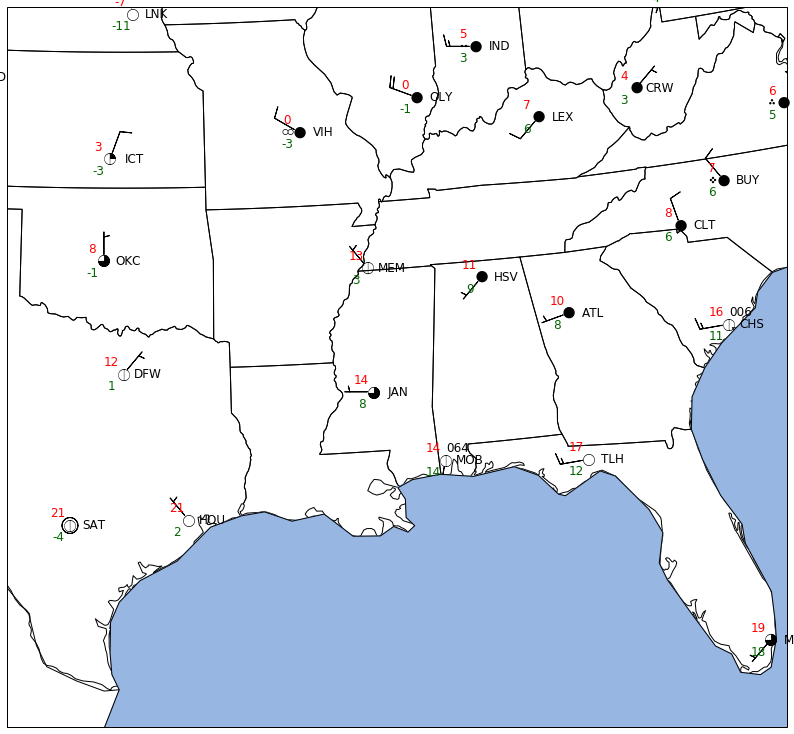

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

sp = MetpyMap()
sp.load_config_file(get_test_data_path('config_map.py'))

sp.load_text()

view = plt.axes([0, 0, 1, 1], projection=to_proj)

sp.draw_map(view)

We can directly access the object and modify attributes.

This example changes the bounding box dictionary of the map.

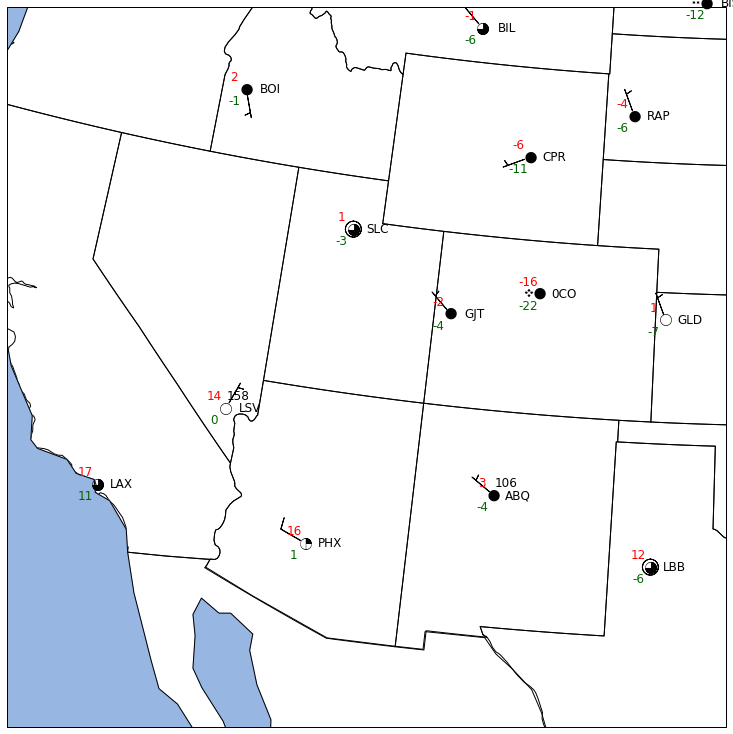

In [5]:
sp.bbox = dict(west=-120, east=-100, south=30, north=45)

view = plt.axes([0, 0, 1, 1], projection=to_proj)

sp.draw_map(view)

What is nice about traitlets is you can enforce types for object attributes. 

For example, the following is the definition for the bounding box (bbox) property of MetpyMap.

In [6]:
from traitlets import Dict, Float

bbox = Dict(traits={"east": Float(allow_none=False), "west": Float(allow_none=False),
                    "north": Float(allow_none=False), "south": Float(allow_none=False)},
            help='map bounding box in lat/lon coordinates').tag(config=True)

bbox = None

This forces bbox to only take a dictionary, and if any of the four keywords are assigned (east, west, north, south), they must be floating point numbers.

In [7]:
sp.bbox = dict(west="-120", east=-100, south=30, north=45)

AttributeError: 'NoneType' object has no attribute 'info'

You can also use interact to update the object properties.

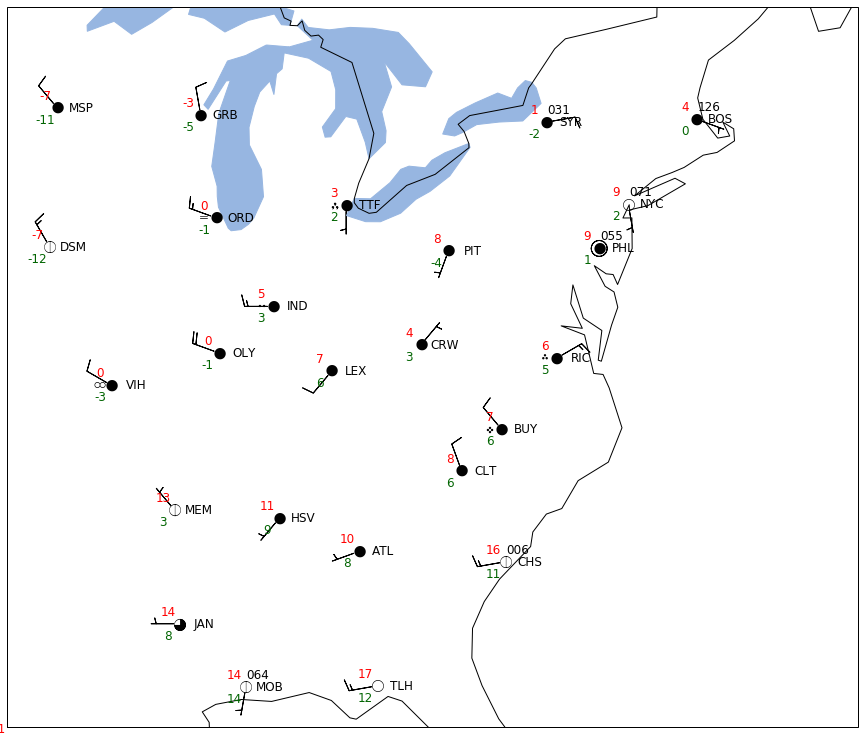

In [8]:
from ipywidgets import interact

long_range = (-120, -60, 5)
lat_range = (20, 50, 5)

@interact(east=long_range, west=long_range, north=lat_range, south=lat_range,
             coastline=True, lakes=True, states=True, borders=True, oceans=True)
def draw_stationmap(coastline=True, lakes=True, states=True, borders=True, oceans=True,
                    east=-70, west=-120, south=20, north=50):
    
    sp.features['OCEANS'] = oceans
    sp.features['BORDERS'] = borders
    sp.features['COASTLINE'] = coastline
    sp.features['LAKES'] = lakes
    sp.features['STATES'] = states
    
    sp.bbox['east'] = east
    sp.bbox['west'] = west
    sp.bbox['south'] = south
    sp.bbox['north'] = north

    view = plt.axes([0, 0, 1, 1], projection=to_proj)
            
    sp.draw_map(view)    